# Geospatial analysis for raster data

**Objectives:** To learn about how to read, write and visualize the raster data using python language. 

### Table of content

###### 1. Installation and importing rasterio
###### 2. Read and write geoTiff raster data
###### 3. Visualization of geoTIff using python
###### 4. Masking raster using shapefile
###### 4. Mathematical operation on raster
###### 5. Reclassification raster (Optional)
###### 6. Resampling raster (Optional)
###### 7. NDVI calculation (Optional)

<br/><br/>
**GDAL** - the Geospatial Data Abstraction Library is a software library for reading and writing raster and vector geospatial data formats and forms the basis of most software for processing geospatial data. Most of the popular GIS softwares like arcGIS, QGIS uses the GDAL for the reading, writing and to do some analysis on geospatial datasets.

For raster data analysis we are going to use [rasterio](https://rasterio.readthedocs.io/en/latest/) package developed by [mapbox](https://www.mapbox.com/). Rasterio is the open-source python package for reading, writing and analyzing the raster dataset.

**Rasterio documentation:** https://rasterio.readthedocs.io

**Rasterio github repo:** https://github.com/mapbox/rasterio

**Rasterio PyPI:** https://pypi.org/project/rasterio/1.2.6/

In [1]:
import rasterio
import numpy as np
import fiona

print('Rasterio version: {}'.format(rasterio.__version__) )
print('fiona version: {}'.format(fiona.__version__) )

Rasterio version: 1.3.9
fiona version: 1.9.5


# Rasterio: 
This is a library used for reading and writing geospatial raster data. Raster data represents images such as aerial photographs or satellite imagery, stored in a grid of pixels.

# Fiona: 
A Python library used for reading and writing vector data in geospatial formats (e.g., shapefiles). It is particularly useful for handling spatial vector formats like GeoJSON or Shapefiles, commonly used for geographic information system (GIS) data.

In [2]:
# path to the raster data
in_img = r"E:\GEOSPATIAL\Geospatial data analysis\geospatial-data-analysis-python\data\geotiff\nepal_lc_2020.tif"

# Open a raster data
ds = rasterio.open(in_img)
print(ds)

# reading the data
data = ds.read()
print(data.shape)

<open DatasetReader name='E:/GEOSPATIAL/Geospatial data analysis/geospatial-data-analysis-python/data/geotiff/nepal_lc_2020.tif' mode='r'>
(1, 1485, 2932)


In [3]:
# what is the name of this image
img_name = ds.name
print('Image filename: ', img_name)
print("----------------------------------------------------------------------------------------------------")

# How many bands does this image have?
num_bands = ds.count
print('Number of bands in image: ', num_bands)
print("----------------------------------------------------------------------------------------------------")

# How many rows and columns?
rows, cols = ds.shape
print('Image size is: {0} rows x {1} columns.'.format(rows, cols))
print("----------------------------------------------------------------------------------------------------")

# What driver was used to open the raster?
driver = ds.driver
print('Raster driver: ', driver)
print("----------------------------------------------------------------------------------------------------")

# What is the raster's projection?
proj = ds.crs
print('Image projection: ', proj)
print("----------------------------------------------------------------------------------------------------")

# What is the raster's "geo-transform"
gt = ds.transform
print('Image geo-transform: ', gt)
print("----------------------------------------------------------------------------------------------------")

# Does the raster have a description?
desc = ds.descriptions
print('Raster description: ', desc)
print("----------------------------------------------------------------------------------------------------")

# Does the raster have a metadata?
metadata = ds.meta
print('All raster metadata: ', metadata)
print("----------------------------------------------------------------------------------------------------")

# Size of the image
data_size = data.size
print("Data size: ", data_size)
print("----------------------------------------------------------------------------------------------------")

# Data type of the image
dtype = data.dtype
print("Data type: ", dtype)
print("----------------------------------------------------------------------------------------------------")

# Get minimum and maximum value 
min_value = data.min()
max_value = data.max()
print("Data minimum value: ", min_value)
print("Data maximum value: ", max_value)
print("----------------------------------------------------------------------------------------------------")

# Get width and height of the raster
shape = data.shape
print("Data shape: ", shape)
print("----------------------------------------------------------------------------------------------------")

Image filename:  E:/GEOSPATIAL/Geospatial data analysis/geospatial-data-analysis-python/data/geotiff/nepal_lc_2020.tif
----------------------------------------------------------------------------------------------------
Number of bands in image:  1
----------------------------------------------------------------------------------------------------
Image size is: 1485 rows x 2932 columns.
----------------------------------------------------------------------------------------------------
Raster driver:  GTiff
----------------------------------------------------------------------------------------------------
Image projection:  EPSG:4326
----------------------------------------------------------------------------------------------------
Image geo-transform:  | 0.00, 0.00, 80.06|
| 0.00,-0.00, 30.47|
| 0.00, 0.00, 1.00|
----------------------------------------------------------------------------------------------------
Raster description:  (None,)
-----------------------------------------

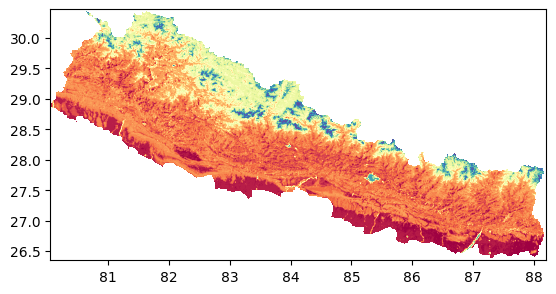

<Axes: >

In [4]:
# import the show function which allows us to display the image
from rasterio.plot import show 


show(ds, transform=ds.transform, cmap='Spectral')

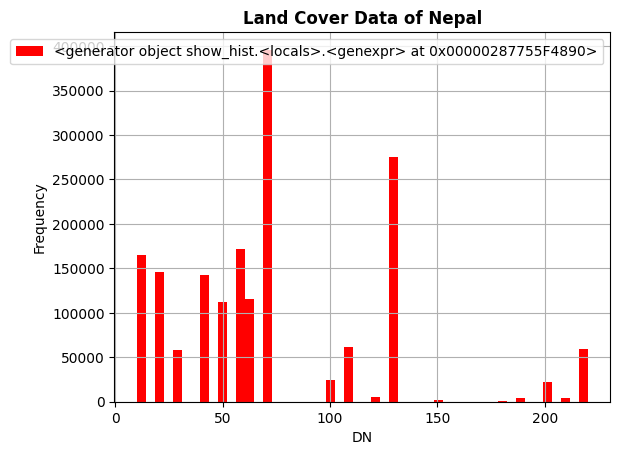

In [5]:
from rasterio.plot import show, show_hist
show_hist(ds, bins=50, title='Land Cover Data of Nepal')


In [7]:
import os

# Define the output directory
output_dir = "../data/output/"

# Create the output directory if it doesn't exist
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

In [9]:
# Write the raster data to a new file
with rasterio.open(os.path.join(output_dir, "writing_LC.tif"), 'w',
                   driver=driver,
                   height=rows,
                   width=cols,
                   count=num_bands,
                   crs=proj,
                   transform=gt,
                   dtype=dtype
                   ) as dst:
    dst.write(data)

In [10]:
import fiona
import rasterio
import rasterio.mask

with fiona.open(r"../data/shp/pokhara.shp", "r") as shapefile:
    shapes = [feature["geometry"] for feature in shapefile]

with rasterio.open(in_img) as src:
    out_image, out_transform = rasterio.mask.mask(src, shapes, crop=True)
    out_meta = src.meta


out_meta.update({"driver": "GTiff",
                 "height": out_image.shape[1],
                 "width": out_image.shape[2],
                 "transform": out_transform})

with rasterio.open("../data/output/mask.tif", "w", **out_meta) as dest:
    dest.write(out_image) 

In [11]:
# Reading the raster as numpy array
ds = rasterio.open(in_img)
data = ds.read(1)

# Add the raster values by constant 1
data = data + 1
print("Data after adding 1: ", data)
print("----------------------------------------------------------------------------------------------------")

# Substract the raster values by constant 2
data = data - 2
print("Data after substracting 2: ", data)
print("----------------------------------------------------------------------------------------------------")

# Multiply the raster values by constant 5
data = data * 5
print("Data after multiplying 5: ", data)
print("----------------------------------------------------------------------------------------------------")

# Divide the raster values by constant 5
data = data / 10
print("Data after dividing by constant 5: ", data)
print("----------------------------------------------------------------------------------------------------")

# Check the min and max values of data
min_value = data.min()
max_value = data.max()
print("min value: ", min_value)
print("max value: ", max_value)
print("----------------------------------------------------------------------------------------------------")

# Create the new raster with new values
with rasterio.open(r'../data/output/raster_math.tif', 'w',
                    driver=ds.driver,
                    width=ds.width,
                   height=ds.height,
                   count=ds.count,
                   crs=ds.crs,
                   transform=ds.transform,
                   dtype=data.dtype
                  ) as dst:
    dst.write(data, indexes=1)
    

Data after adding 1:  [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
----------------------------------------------------------------------------------------------------
Data after substracting 2:  [[254 254 254 ... 254 254 254]
 [254 254 254 ... 254 254 254]
 [254 254 254 ... 254 254 254]
 ...
 [254 254 254 ... 254 254 254]
 [254 254 254 ... 254 254 254]
 [254 254 254 ... 254 254 254]]
----------------------------------------------------------------------------------------------------
Data after multiplying 5:  [[246 246 246 ... 246 246 246]
 [246 246 246 ... 246 246 246]
 [246 246 246 ... 246 246 246]
 ...
 [246 246 246 ... 246 246 246]
 [246 246 246 ... 246 246 246]
 [246 246 246 ... 246 246 246]]
----------------------------------------------------------------------------------------------------
Data after dividing by constant 5:  [[24.6 24.6 24.6 ... 24.6 24.6 24.6]
 [24.6 24.6 24.6 ... 24.6 24.6 24.6]
 [24.6

In [12]:
ds = rasterio.open(in_img)
data = ds.read()

lista = data.copy()

lista[np.where((lista >=10) & (lista <= 40))] = 1 # Agriculture
lista[np.where((lista >=50) & (lista <= 100))] = 2 # Forest
lista[np.where((lista >=110) & (lista <= 180))] = 3 # grass land
lista[np.where(lista >=190 )] = 4 #urban
lista[np.where(lista >=200)] = 5 #bareland
lista[np.where((lista >=210) & (lista <= 200))] = 6 #Water


with rasterio.open('../data/output/reclassify_lc_2020.tif', 'w',
                   driver=ds.driver,
                   height=ds.height,
                   width=ds.width,
                   count=ds.count,
                   crs=ds.crs,
                   transform=ds.transform,
                   dtype=data.dtype

) as dst:
      dst.write(lista)

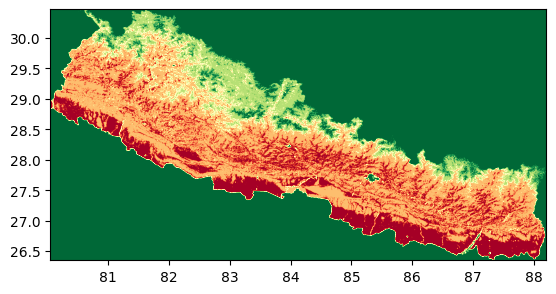

<Axes: >

In [13]:
# Read data
ds = rasterio.open(r"../data/output/reclassify_lc_2020.tif")
show(ds, transform=ds.transform, cmap='RdYlGn')

In [14]:
from rasterio.enums import Resampling

#factor to rescale the raster
upscale_factor = 2

with rasterio.open(in_img) as dataset:

    print("Old shape of raster: ", dataset.shape)
    
    # resample data to target shape
    data = dataset.read(
        out_shape=(
            dataset.count,
            int(dataset.height * upscale_factor),
            int(dataset.width * upscale_factor)
        ),
        resampling=Resampling.bilinear
    )
  
    with rasterio.open(r"../data/output/resample_lc.tif", 'w',
                  driver = dataset.driver,
                  height = int(dataset.height * upscale_factor),
                  width = int(dataset.width * upscale_factor),
                  count = dataset.count,
                  crs = dataset.crs,
                  transform = dataset.transform,
                  dtype = data.dtype) as dst:
        dst.write(data)
    

d_res = rasterio.open(r'../data/output/resample_lc.tif')
print("New shape of raster: ", d_res.shape)

Old shape of raster:  (1485, 2932)
New shape of raster:  (2970, 5864)


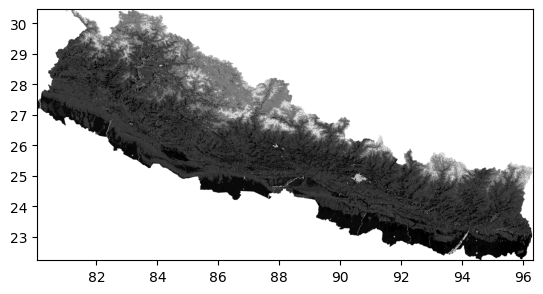

<Axes: >

In [15]:
show(d_res, transform=ds.transform, cmap='gray')

In [16]:
from rasterio.enums import Resampling

#factor to rescale the raster
upscale_factor = 2

with rasterio.open(in_img) as dataset:

    print("Old shape of raster: ", dataset.shape)
    
    # resample data to target shape
    data = dataset.read(
        out_shape=(
            dataset.count,
            int(dataset.height * upscale_factor),
            int(dataset.width * upscale_factor)
        ),
        resampling=Resampling.bilinear
    )
    

    # scale image transform
    transform = dataset.transform * dataset.transform.scale(
        (dataset.width / data.shape[-1]),
        (dataset.height / data.shape[-2])
    )
  
    with rasterio.open(r"../data/output/resample_lc_corrected.tif", 'w',
                  driver = dataset.driver,
                  height = int(dataset.height * upscale_factor),
                  width = int(dataset.width * upscale_factor),
                  count = dataset.count,
                  crs = dataset.crs,
                  transform = transform,  # Correct transform value
                  dtype = data.dtype) as dst:
        dst.write(data)
    

d_res = rasterio.open(r'../data/output/resample_lc.tif')
print("New shape of raster: ", d_res.shape)

Old shape of raster:  (1485, 2932)
New shape of raster:  (2970, 5864)


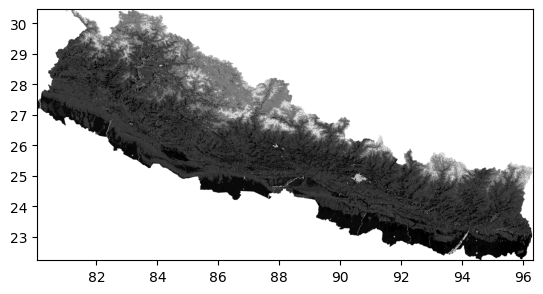

<Axes: >

In [17]:
show(d_res, transform=ds.transform, cmap='gray')

In [18]:
# Setting image location
img_red = r"../data/geotiff/MODIS_18Dec17_RED.tif"
img_nir = r"../data/geotiff/MODIS_18Dec17_NIR.tif"

# Reading raster
ds_nir = rasterio.open(img_nir)
data_nir = ds_nir.read()
ds_red = rasterio.open(img_red)
data_red = ds_red.read()

data_NDVI = (data_nir - data_red) / (data_nir + data_red)

# Create the NDVI raster
with rasterio.open('../data/output/ndvi.tif', 'w',
                   driver=ds_nir.driver,
                   width=ds_nir.width,
                   height=ds_nir.height,
                   count=ds_nir.count,
                   crs=ds_nir.crs,
                   trasform=ds_nir.transform,
                   dtype='float64'
                   ) as dst:
    dst.write(data_NDVI)

C:\Users\prash\AppData\Roaming\Python\Python310\site-packages\rasterio\__init__.py:327: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = writer(


In [25]:
with rasterio.open('../data/output/ndvi.tif', 'w',
                   driver=ds_nir.driver,
                   width=ds_nir.width,
                   height=ds_nir.height,
                   count=ds_nir.count,
                   crs=ds_nir.crs,
                   transform=ds_nir.transform,
                   dtype='float64') as dst:
    dst.write(data_NDVI)

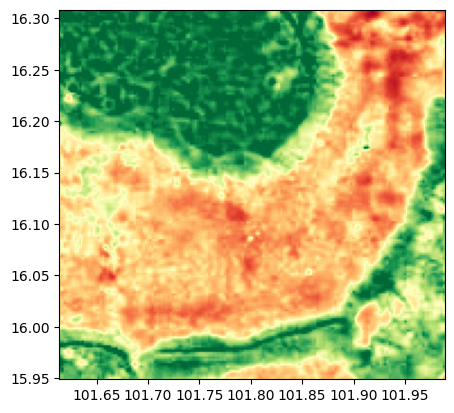

<Axes: >

In [26]:
ds = rasterio.open(r'../data/output/ndvi.tif')
show(ds, transform=ds.transform, cmap='RdYlGn')

In [27]:
# Setting image location
img_red = r"../data/geotiff/MODIS_18Dec17_RED.tif"
img_nir = r"../data/geotiff/MODIS_18Dec17_NIR.tif"

# Reading raster
ds_nir = rasterio.open(img_nir)
data_nir = ds_nir.read()
ds_red = rasterio.open(img_red)
data_red = ds_red.read()

# Calculate NDVI
data_NDVI = (data_nir - data_red) / (data_nir + data_red)

# Create the NDVI raster
with rasterio.open('../data/output/ndvi_dec.tif', 'w',
                   driver=ds_nir.driver,
                   width=ds_nir.width,
                   height=ds_nir.height,
                   count=ds_nir.count,
                   crs=ds_nir.crs,
                   transform=ds_nir.transform,
                   dtype='float64') as dst:
    dst.write(data_NDVI)


In [23]:
import os

output_dir = "../data/output/"
if not os.path.exists(output_dir):
    os.makedirs(output_dir)


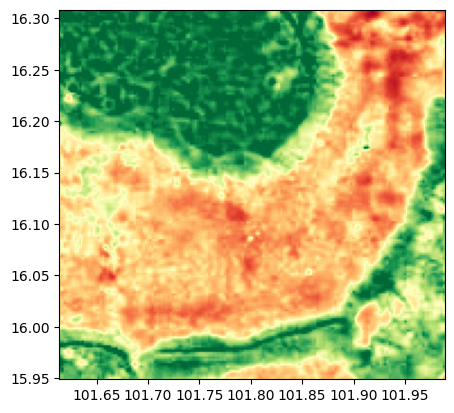

<Axes: >

In [28]:
ds = rasterio.open(r'../data/output/ndvi_dec.tif')  # Or '../data/output/ndvi.tif'
show(ds, transform=ds.transform, cmap='RdYlGn')


In [29]:
# import matplotlib
import matplotlib.pyplot as plt

# import geopandas
import geopandas as gpd

# check the version of geopandas
print("GeoPandas verison: {}".format(gpd.__version__))

GeoPandas verison: 0.14.1


In [30]:
# path to the shapefile
in_shp = r"../data/shp/municipality.shp"
in_geojson = r"../data/geojson/municipality.geojson"

# open and read the shp
gdf = gpd.read_file(in_shp)

In [31]:
# use head command to see the structure of shapefile
gdf.head()

,OBJECTID,DISTRICT,GaPa_NaPa,Type_GN,Province,SCode,DCode,SDD,MCode,length,area,SDDMM,Nepali,Shape_Leng,Shape_Area,geometry
0,1,TAPLEJUNG,Aathrai Tribeni,Gaunpalika,1,1,1,101,1,44.672747,88.825948,10101,à¤à¤ à¤°à¤¾à¤ à¤¤à¥à¤°à¤¿à¤µà¥à¤£à¥,0.430900,0.008075,"POLYGON ((87.60718 27.37074, 87.60840 27.36974..."
1,2,TAPLEJUNG,Maiwakhola,Gaunpalika,1,1,1,101,2,61.067429,137.848122,10102,à¤®à¥à¤µà¤¾à¤à¥à¤²à¤¾,0.577692,0.012540,"POLYGON ((87.50136 27.42931, 87.50406 27.42861..."
2,3,TAPLEJUNG,Meringden,Gaunpalika,1,1,1,101,3,75.987469,210.313039,10103,à¤®à¥à¤°à¤¿à¤à¤¦à¥à¤¨,0.718499,0.019148,"POLYGON ((87.51006 27.56923, 87.50928 27.56793..."
3,4,TAPLEJUNG,Mikwakhola,Gaunpalika,1,1,1,101,4,123.175400,442.960328,10104,à¤®à¤¿à¤à¥à¤µà¤¾à¤à¥à¤²à¤¾,1.164097,0.040365,"POLYGON ((87.68623 27.70966, 87.68668 27.70899..."
4,5,TAPLEJUNG,Phaktanglung,Gaunpalika,1,1,1,101,5,228.107830,1858.441119,10105,à¤«à¤à¥à¤¤à¤¾à¤à¤²à¥à¤,2.186142,0.169452,"POLYGON ((87.83464 27.95145, 87.83568 27.95148..."


In [32]:
# How many provience are there?
num_of_provience = len(gdf)
print("Nuber of provience: ", num_of_provience)
print("----------------------------------------------------------------------------------------------------")

# What is the coordinate system of the data?
crs = gdf.crs
print("Projection of data: ", crs)
print("----------------------------------------------------------------------------------------------------")

# what is the geometry type of data?
geom_type = set(gdf.geom_type)
print("Geometry of data: ", geom_type)
print("----------------------------------------------------------------------------------------------------")

Nuber of provience:  774
----------------------------------------------------------------------------------------------------
Projection of data:  EPSG:4326
----------------------------------------------------------------------------------------------------
Geometry of data:  {'MultiPolygon', 'Polygon'}
----------------------------------------------------------------------------------------------------


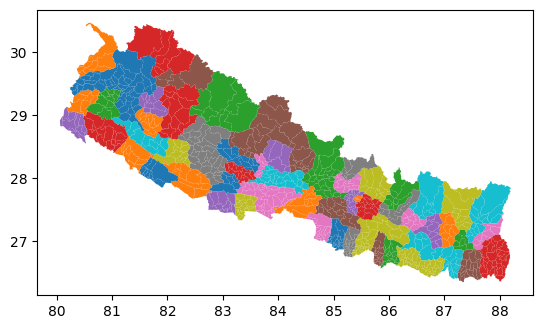

In [33]:
plot = gdf.plot("DISTRICT")

<Axes: >

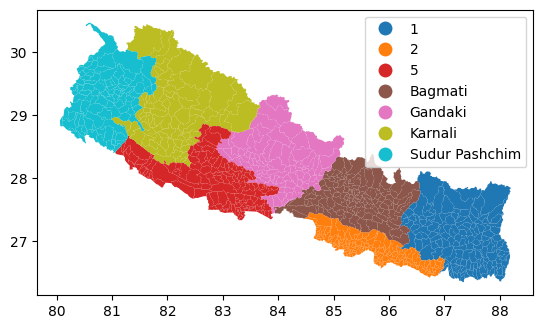

In [34]:
gdf.plot('Province', legend=True)

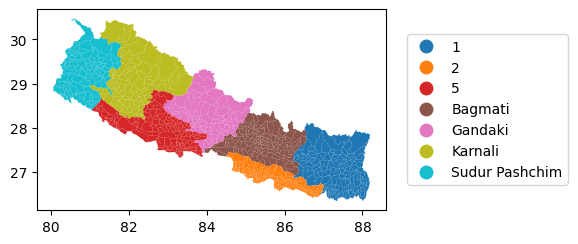

In [35]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, figsize=(4.5, 10))
gdf.plot(ax=ax, column='Province', legend=True, legend_kwds={"loc": 'center left'})
leg = ax.get_legend()
leg.set_bbox_to_anchor((1.04, 0.5))

In [36]:
gdf.to_file('../data/output/out.shp')

In [37]:
# geojson output
gdf.to_file("../data/output/out.geojson", driver='GeoJSON',encoding='utf-8')

# geopackage output
gdf.to_file("../data/output/out.gpkg", layer="province", driver='GPKG',encoding='utf-8')

In [38]:
gdf.head()

,OBJECTID,DISTRICT,GaPa_NaPa,Type_GN,Province,SCode,DCode,SDD,MCode,length,area,SDDMM,Nepali,Shape_Leng,Shape_Area,geometry
0,1,TAPLEJUNG,Aathrai Tribeni,Gaunpalika,1,1,1,101,1,44.672747,88.825948,10101,à¤à¤ à¤°à¤¾à¤ à¤¤à¥à¤°à¤¿à¤µà¥à¤£à¥,0.430900,0.008075,"POLYGON ((87.60718 27.37074, 87.60840 27.36974..."
1,2,TAPLEJUNG,Maiwakhola,Gaunpalika,1,1,1,101,2,61.067429,137.848122,10102,à¤®à¥à¤µà¤¾à¤à¥à¤²à¤¾,0.577692,0.012540,"POLYGON ((87.50136 27.42931, 87.50406 27.42861..."
2,3,TAPLEJUNG,Meringden,Gaunpalika,1,1,1,101,3,75.987469,210.313039,10103,à¤®à¥à¤°à¤¿à¤à¤¦à¥à¤¨,0.718499,0.019148,"POLYGON ((87.51006 27.56923, 87.50928 27.56793..."
3,4,TAPLEJUNG,Mikwakhola,Gaunpalika,1,1,1,101,4,123.175400,442.960328,10104,à¤®à¤¿à¤à¥à¤µà¤¾à¤à¥à¤²à¤¾,1.164097,0.040365,"POLYGON ((87.68623 27.70966, 87.68668 27.70899..."
4,5,TAPLEJUNG,Phaktanglung,Gaunpalika,1,1,1,101,5,228.107830,1858.441119,10105,à¤«à¤à¥à¤¤à¤¾à¤à¤²à¥à¤,2.186142,0.169452,"POLYGON ((87.83464 27.95145, 87.83568 27.95148..."


In [39]:
prov_1 = gdf[gdf['Province'] == '1']
len(prov_1)

139

<Axes: >

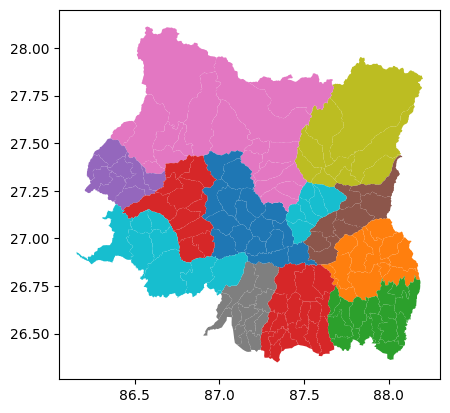

In [40]:
prov_1.plot('DISTRICT')

<Axes: >

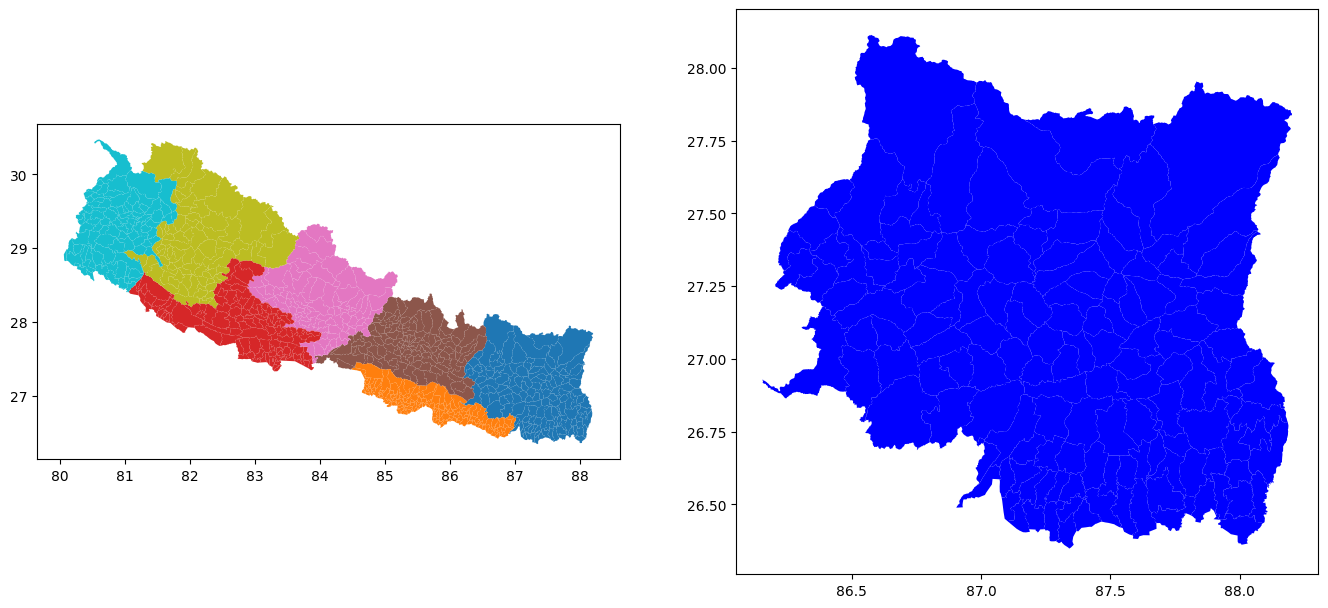

In [41]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16.53, 11.69))
gdf.plot(ax=ax1, column="Province")
prov_1.plot(ax=ax2, color="#0000ff")

In [42]:
# try to copy the original dataframe so that all changes will stored on copied dataframe
gdf_copy = gdf.copy

# The data is avilable on geograpic coordinate system, so change the coordinate system to projected coordinate
gdf_copy = gdf.to_crs(epsg=32642)

# Calculate the area using geometry.area and divide it by 10^6 (1000*1000)
gdf_copy["area"] = gdf_copy.geometry.area / 10**6

# check the new dataframe with area column
gdf_copy.head()

,OBJECTID,DISTRICT,GaPa_NaPa,Type_GN,Province,SCode,DCode,SDD,MCode,length,area,SDDMM,Nepali,Shape_Leng,Shape_Area,geometry
0,1,TAPLEJUNG,Aathrai Tribeni,Gaunpalika,1,1,1,101,1,44.672747,96.280621,10101,à¤à¤ à¤°à¤¾à¤ à¤¤à¥à¤°à¤¿à¤µà¥à¤£à¥,0.430900,0.008075,"POLYGON ((2358841.007 3169538.403, 2358983.038..."
1,2,TAPLEJUNG,Maiwakhola,Gaunpalika,1,1,1,101,2,61.067429,149.285734,10102,à¤®à¥à¤µà¤¾à¤à¥à¤²à¤¾,0.577692,0.012540,"POLYGON ((2347028.165 3174557.392, 2347315.271..."
2,3,TAPLEJUNG,Meringden,Gaunpalika,1,1,1,101,3,75.987469,227.784418,10103,à¤®à¥à¤°à¤¿à¤à¤¦à¥à¤¨,0.718499,0.019148,"POLYGON ((2345444.279 3190659.389, 2345387.982..."
3,4,TAPLEJUNG,Mikwakhola,Gaunpalika,1,1,1,101,4,123.175400,479.962262,10104,à¤®à¤¿à¤à¥à¤µà¤¾à¤à¥à¤²à¤¾,1.164097,0.040365,"POLYGON ((2360845.415 3209481.029, 2360903.065..."
4,5,TAPLEJUNG,Phaktanglung,Gaunpalika,1,1,1,101,5,228.107830,2017.274799,10105,à¤«à¤à¥à¤¤à¤¾à¤à¤²à¥à¤,2.186142,0.169452,"POLYGON ((2371526.674 3239468.606, 2371631.835..."


<Axes: >

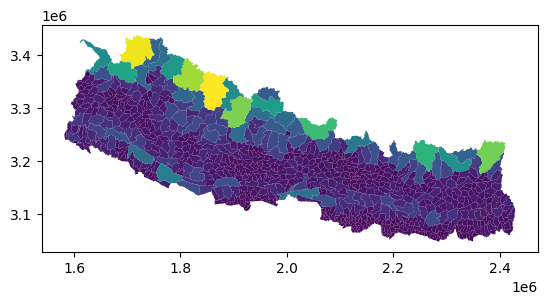

In [43]:
gdf_copy.plot('area')

<Axes: >

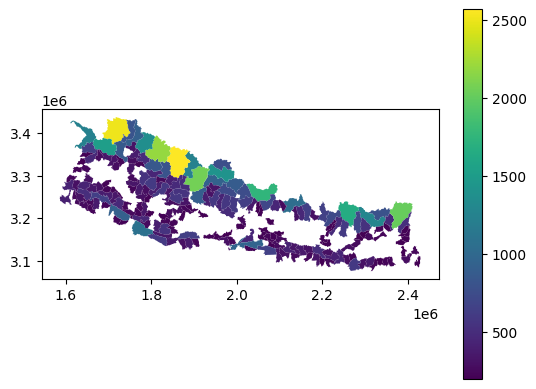

In [44]:
gdf_area_filter = gdf_copy[gdf_copy['area'] > 200]
gdf_area_filter.plot(column='area', legend=True)

In [45]:
gdf_filter = gdf_copy[['DISTRICT', 'area', 'geometry']]
gdf_district = gdf_filter.dissolve(by='DISTRICT', aggfunc='sum')
len(gdf_district)

77

<Axes: >

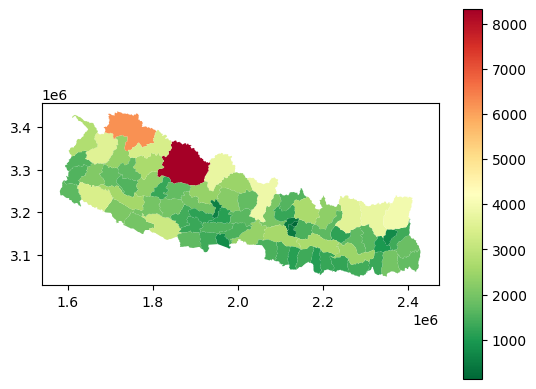

In [46]:
gdf_district.plot('area', cmap="RdYlGn_r", legend=True)

In [47]:
gdf_district.to_file('../data/output/district.shp')

In [48]:
from shapely.geometry import Polygon, LineString, Point

p1 = Point(85, 30)
p2 = Point(80, 25)
l1 = LineString([p1, p2])
poly1 = Polygon([(82, 25), (83, 26), (82, 23)])

In [49]:
df_shapely = gpd.GeoSeries([p1, p2, l1, poly1])
df_shapely = gpd.GeoDataFrame(df_shapely)
df_shapely.columns = ['geometry']
df_shapely.crs = "EPSG:4326"
df_shapely.head()

ValueError: Assigning CRS to a GeoDataFrame without a geometry column is not supported. Use GeoDataFrame.set_geometry to set the active geometry column.

In [50]:
gdf = gdf.set_geometry('geometry')

In [52]:
# Ensure that the correct geometry column is set as the active geometry
gdf = gdf.set_geometry('geometry')

# Assign the CRS (for example, EPSG:4326 for WGS84)
gdf = gdf.set_crs(epsg=4326)
df_shapely.head()

,geometry
0,POINT (85.00000 30.00000)
1,POINT (80.00000 25.00000)
2,"LINESTRING (85.00000 30.00000, 80.00000 25.00000)"
3,"POLYGON ((82.00000 25.00000, 83.00000 26.00000..."


In [53]:
df_shapely.to_file("../data/output/shapely.geojson", driver='GeoJSON')

TypeError: Cannot interpret '<geopandas.array.GeometryDtype object at 0x00000287064756C0>' as a data type

In [54]:
# Check if there are any missing geometries (NaN values)
missing_geometries = gdf_shapely[gdf_shapely['geometry'].isna()]
print("Missing geometries:", len(missing_geometries))

# Check if all geometries are valid
valid_geometries = gdf_shapely.geometry.is_valid
print("Invalid geometries:", len(gdf_shapely[~valid_geometries]))


NameError: name 'gdf_shapely' is not defined

In [55]:
import geopandas as gpd
from shapely.geometry import Point, Polygon

# Example Data: Re-creating 'df_shapely' if it was created manually
data = {
    'name': ['Point A', 'Point B', 'Polygon A'],
    'geometry': [Point(85, 30), Point(80, 25), Polygon([(82, 25), (83, 26), (82, 23)])]
}

# Creating a DataFrame with geometries
df_shapely = gpd.GeoDataFrame(data, geometry='geometry')

# Setting the CRS (assuming WGS84)
df_shapely = df_shapely.set_crs(epsg=4326)

# Now, assign it to gdf_shapely
gdf_shapely = df_shapely


In [56]:
# Check if there are any missing geometries (NaN values)
missing_geometries = gdf_shapely[gdf_shapely['geometry'].isna()]
print("Missing geometries:", len(missing_geometries))

# Check if all geometries are valid
valid_geometries = gdf_shapely.geometry.is_valid
print("Invalid geometries:", len(gdf_shapely[~valid_geometries]))


Missing geometries: 0
Invalid geometries: 0


In [57]:
gdf_shapely = gdf_shapely[gdf_shapely['geometry'].notna()]


In [58]:
gdf_shapely.to_file("../data/output/shapely.geojson", driver='GeoJSON')


In [59]:
# import required library
import pandas as pd
import numpy as np

# dataframe for population data
df_population = pd.read_csv('../data/csv/population.csv')

In [60]:
df_population.head()

,District,registered voters,Total population,Unnamed: 3,DIST UPPER
0,Achham,257477,127742,NaN,ACHHAM
1,Arghakhanchi,197632,126699,NaN,ARGHAKHANCHI
2,Baglung,268613,156802,NaN,BAGLUNG
3,Baitadi,250898,124824,NaN,BAITADI
4,Bajhang,195159,97610,NaN,BAJHANG


In [61]:
gdf = gpd.read_file('../data/output/district.shp')
gdf.head()

,DISTRICT,area,geometry
0,ACHHAM,1759.970503,"POLYGON ((1703471.099 3262667.717, 1703245.803..."
1,ARGHAKHANCHI,1298.464146,"POLYGON ((1885472.592 3169979.477, 1885530.686..."
2,BAGLUNG,1925.260115,"POLYGON ((1909666.910 3202333.321, 1909480.140..."
3,BAITADI,1538.498796,"POLYGON ((1607271.264 3300449.561, 1607176.710..."
4,BAJHANG,3576.588898,"POLYGON ((1670794.437 3315594.370, 1670660.574..."


In [62]:
gdf_polulation = gdf.merge(df_population, how="left", left_on="DISTRICT", right_on="DIST UPPER")

In [63]:
gdf_polulation.head()

,DISTRICT,area,geometry,District,registered voters,Total population,Unnamed: 3,DIST UPPER
0,ACHHAM,1759.970503,"POLYGON ((1703471.099 3262667.717, 1703245.803...",Achham,257477.0,127742.0,NaN,ACHHAM
1,ARGHAKHANCHI,1298.464146,"POLYGON ((1885472.592 3169979.477, 1885530.686...",Arghakhanchi,197632.0,126699.0,NaN,ARGHAKHANCHI
2,BAGLUNG,1925.260115,"POLYGON ((1909666.910 3202333.321, 1909480.140...",Baglung,268613.0,156802.0,NaN,BAGLUNG
3,BAITADI,1538.498796,"POLYGON ((1607271.264 3300449.561, 1607176.710...",Baitadi,250898.0,124824.0,NaN,BAITADI
4,BAJHANG,3576.588898,"POLYGON ((1670794.437 3315594.370, 1670660.574...",Bajhang,195159.0,97610.0,NaN,BAJHANG


In [64]:
gdf_polulation = gdf_polulation[['DISTRICT', 'area', 'geometry', 'Total population']]
gdf_polulation.head()

,DISTRICT,area,geometry,Total population
0,ACHHAM,1759.970503,"POLYGON ((1703471.099 3262667.717, 1703245.803...",127742.0
1,ARGHAKHANCHI,1298.464146,"POLYGON ((1885472.592 3169979.477, 1885530.686...",126699.0
2,BAGLUNG,1925.260115,"POLYGON ((1909666.910 3202333.321, 1909480.140...",156802.0
3,BAITADI,1538.498796,"POLYGON ((1607271.264 3300449.561, 1607176.710...",124824.0
4,BAJHANG,3576.588898,"POLYGON ((1670794.437 3315594.370, 1670660.574...",97610.0


In [65]:
null_val = gdf_polulation[gdf_polulation['Total population'].isnull()]
null_val

,DISTRICT,area,geometry,Total population
46,NAWALPARASI_E,1505.162437,"POLYGON ((1985537.919 3126987.613, 1985328.886...",NaN
47,NAWALPARASI_W,764.765830,"POLYGON ((1978812.019 3132849.409, 1979020.933...",NaN
59,RUKUM_E,1758.231369,"POLYGON ((1873301.426 3247693.287, 1873298.826...",NaN
60,RUKUM_W,1265.019197,"POLYGON ((1826425.146 3233977.821, 1826377.015...",NaN
